<a href="https://colab.research.google.com/github/bvolcan/treinamento-h2ia/blob/main/MultiPerceptron_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiperceptron

Nesta tarefa você deve implementar múltiplos perceptrons para classificar o dataset [MNIST](https://en.wikipedia.org/wiki/MNIST_database).

Essa dataset contém imagens com algarismos, de zero a nove, escritos a mão.
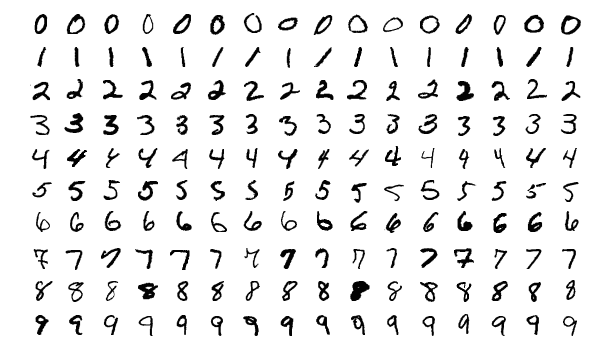



In [275]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_digits

In [276]:
digits = load_digits()

In [277]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

### Variável com os rótulos

In [278]:
digits.target.shape

(1797,)

In [279]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

### Variável com as matrizes dos dígitos

In [280]:
digits.images.shape

(1797, 8, 8)

In [281]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

### Variável com as matrizes rearranjadas (uma linha após a outra em um grande arranjo linear)

In [282]:
digits.data.shape

(1797, 64)

In [283]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

Text(0.5, 1.0, 'Exemplo de dígito MNIST')

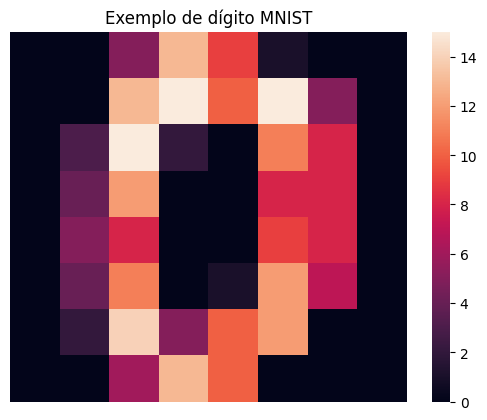

In [284]:
sns.heatmap(digits.images[0],linewidth=0, xticklabels=False, yticklabels=False)
plt.title('Exemplo de dígito MNIST')


# Tarefa

Em uma abordagem multiperceptron (não confundir com [multilayer perceptron](https://en.wikipedia.org/wiki/Multilayer_perceptron)) você deve criar um perceptron para cada classe do problema e treiná-los individualmente. Depois, vocês devem aplicar exemplos de *teste*, nunca vistos pelos perceptrons, a todos os perceptrons e usar alguma lógica para decidir qual é o digito contido na imagem.

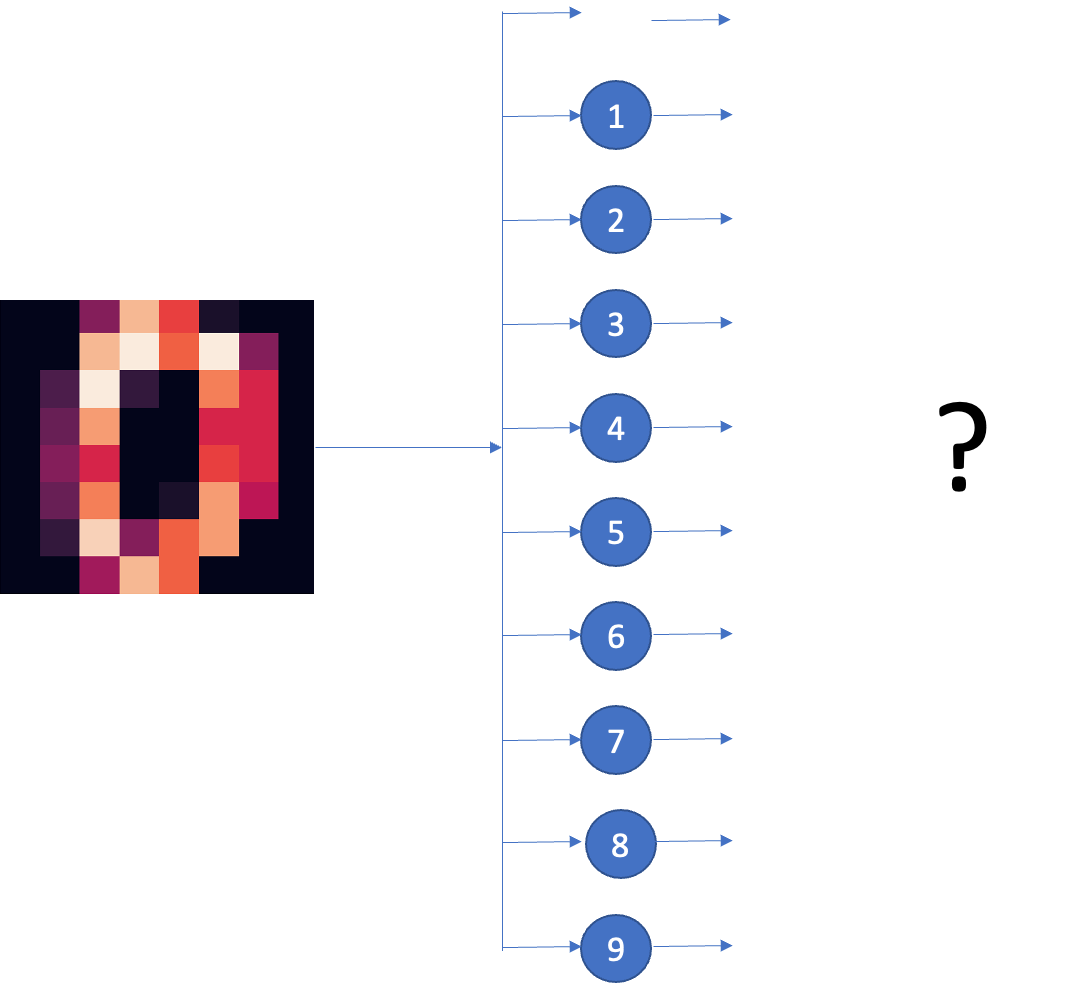

## Dicas
* https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

In [285]:
class Perceptron:
  def __init__(self, learn_rate=0.01, iterations=10):
    self.learn_rate = learn_rate
    self.iterations = iterations

  def fit(self, rows, target_class):
    self.weights = np.zeros(1 + rows.shape[1])
    self.errors = []

    for _ in range(self.iterations):
      errors = 0
      for row_i, target in zip(rows, target_class):
        update = self.learn_rate * (target - self.predict(row_i))
        self.weights[1:] += update * row_i
        self.weights[0] += update
        errors += int(update != 0.0)
      self.errors.append(errors)
  
  def predict(self, rows):
    return np.where(self.net_input(rows) >= 0.0, 1, -1)
  
  def net_input(self, rows):
    return np.dot(rows, self.weights[1:]) + self.weights[0]

In [286]:
models = []
for i in range(10):
  temp = Perceptron(learn_rate=0.001, iterations=30)
  models.append(temp)

In [287]:
from sklearn.model_selection import train_test_split

In [288]:
mergedData = np.concatenate( [ np.array( digits.data ), np.array( [digits.target] ).T ] , axis = 1)

digits.feature_names.append('target')

mergedDataFrame = pd.DataFrame(data=mergedData, columns=digits.feature_names)

train, test = train_test_split(mergedDataFrame, test_size=0.3, stratify=mergedDataFrame["target"])

In [289]:
for index, model in enumerate(models):
  tempDataSet = mergedDataFrame.copy()
  tempDataSet.loc[tempDataSet.target != index, 'target'] = -1
  tempDataSet.loc[tempDataSet.target == index, 'target'] = 1

  model.fit((tempDataSet.drop(columns=['target'])).values, tempDataSet["target"].values)

In [290]:
predictions=np.empty((10,test.shape[0]))
for index, model in enumerate(models):
  predictions[index] = model.predict(test.drop(columns=['target']).values)

In [291]:
correct = 0
wrong = 0
wrongIndexes = []

for index, testTarget in enumerate(test['target']):
  foundIndex = np.where(predictions[:,index] == 1)
  # print(predictions[:,index], testTarget)
  if(len(foundIndex[0]) > 0 and foundIndex[0][0] == testTarget):
    # print(foundIndex[0][0], testTarget)
    correct += 1
  else:
    wrong += 1
    wrongIndexes += [index]

result = (correct / (correct + wrong)) * 100
print(result)
print(correct, wrong)
print(wrongIndexes)

91.66666666666666
495 45
[13, 46, 69, 80, 93, 94, 106, 114, 116, 126, 129, 130, 150, 163, 177, 198, 204, 210, 229, 245, 250, 263, 294, 297, 325, 332, 341, 348, 366, 370, 384, 407, 419, 435, 437, 452, 458, 460, 461, 468, 480, 496, 504, 521, 531]


In [292]:
# debugging
printIndex = 299
print(test['target'].iloc[printIndex], (np.where(predictions[:,printIndex] == 1))[0])

4.0 [4]
